In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
april_sale = pd.read_csv("Sales_Data/Sales_April_2019.csv")
april_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Combine all the monthly dataset


In [4]:
from os import listdir 
from os.path import isfile, join


only_file = [f for f in listdir("./Sales_Data") if isfile(join("./Sales_Data", f))]
only_file

['Sales_October_2019.csv',
 'Sales_December_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_August_2019.csv',
 'Sales_September_2019.csv']

In [5]:
all_sales = pd.DataFrame()

for sale in only_file:
    monthy_sales = pd.read_csv("Sales_Data/" + sale)
    all_sales = pd.concat([all_sales, monthy_sales])

all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
all_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [7]:
all_sales.to_csv("all_sales.csv", index=False)

In [8]:
all_sales = pd.read_csv("all_sales.csv")
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


### Convert Order Date column to Datetime

In [9]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [10]:
all_sales.shape

(186850, 6)

In [11]:
all_sales["Order Date"] = all_sales["Order Date"].astype(str) 

In [12]:
all_types = []
for date in all_sales["Order Date"]:
    all_types.append(type(date))
all_types = pd.Series(all_types)  
all_types.value_counts()

<class 'str'>    186850
dtype: int64

In [13]:
#finding missing dates on the dataframa

not_dates = []
for date in all_sales["Order Date"]:
    if not date.startswith(("0", "1")):
        not_dates.append(date)

not_dates = pd.Series(not_dates)
not_dates.value_counts()

nan           545
Order Date    355
dtype: int64

In [14]:
all_sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date            0
Purchase Address    545
dtype: int64

In [15]:
all_sales.dropna(inplace=True)

In [16]:
all_sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [17]:
#finding missing dates on the dataframa

not_dates = []
for date in all_sales["Order Date"]:
    if not date.startswith(("0", "1")):
        not_dates.append(date)

not_dates = pd.Series(not_dates)
not_dates.value_counts()

Order Date    355
dtype: int64

In [18]:
cleaned_date = all_sales[all_sales["Order Date"]  != "Order Date"]

cleaned_date.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [19]:
not_dates = []
for date in cleaned_date["Order Date"]:
    if not date.startswith(("0", "1")):
        not_dates.append(date)

not_dates = pd.Series(not_dates)
not_dates.value_counts()

/home/geso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Series([], dtype: int64)

In [29]:
cleaned_date.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [30]:
cleaned_date.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [31]:
cleaned_date = cleaned_date.dropna()

In [32]:
cleaned_date.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [35]:
all_sales = cleaned_date.copy()
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [36]:
all_sales["Order Date"] = pd.to_datetime(all_sales["Order Date"])

In [37]:
all_sales["Month"] = all_sales["Order Date"].apply(lambda x: x.month)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10


In [39]:
all_sales = all_sales.sort_values("Month")
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
123707,147247,Google Phone,1,600,2019-01-24 22:43:00,"862 Spruce St, Austin, TX 73301",1
123685,147226,Apple Airpods Headphones,1,150,2019-01-05 09:50:00,"855 6th St, Seattle, WA 98101",1
123696,147237,AA Batteries (4-pack),2,3.84,2019-01-30 01:06:00,"986 Willow St, San Francisco, CA 94016",1
123695,147236,AAA Batteries (4-pack),4,2.99,2019-01-29 20:28:00,"773 Ridge St, San Francisco, CA 94016",1
123694,147235,AAA Batteries (4-pack),1,2.99,2019-01-31 08:40:00,"474 Main St, Los Angeles, CA 90001",1


### Number of sales & volue sold per month

#### Number of sales

In [40]:
monthly_sales_nbr = all_sales["Month"].value_counts()
monthly_sales_nbr

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

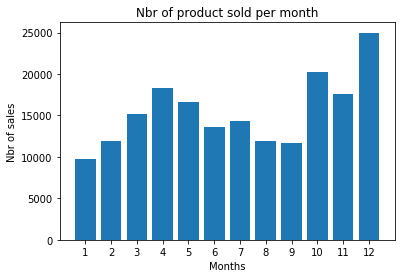

In [43]:
fig, ax = plt.subplots()

ax.bar(monthly_sales_nbr.index, monthly_sales_nbr.values)
ax.set_title(label="Nbr of product sold per month")
months = np.arange(0,12) + 1 
ax.set_xticks(months)
ax.set_xlabel("Months")
ax.set_ylabel("Nbr of sales")
plt.show()

In [45]:
all_sales["Price Each"] = all_sales["Price Each"].astype("float64")
all_sales["Quantity Ordered"] = all_sales["Quantity Ordered"].astype("float64")

In [56]:
all_sales["Value Sold"] = all_sales["Quantity Ordered"] * all_sales["Price Each"]
# all_sales = all_sales.drop("Value sold", axis=1)
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Value Sold
123707,147247,Google Phone,1.0,600.00,2019-01-24 22:43:00,"862 Spruce St, Austin, TX 73301",1,600.00
123685,147226,Apple Airpods Headphones,1.0,150.00,2019-01-05 09:50:00,"855 6th St, Seattle, WA 98101",1,150.00
123696,147237,AA Batteries (4-pack),2.0,3.84,2019-01-30 01:06:00,"986 Willow St, San Francisco, CA 94016",1,7.68
123695,147236,AAA Batteries (4-pack),4.0,2.99,2019-01-29 20:28:00,"773 Ridge St, San Francisco, CA 94016",1,11.96
123694,147235,AAA Batteries (4-pack),1.0,2.99,2019-01-31 08:40:00,"474 Main St, Los Angeles, CA 90001",1,2.99


#### Volume sold per month

In [65]:
sales_per_month = all_sales.pivot_table(index="Month", values="Value Sold", aggfunc=np.sum)
sales_per_month

,Value Sold
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


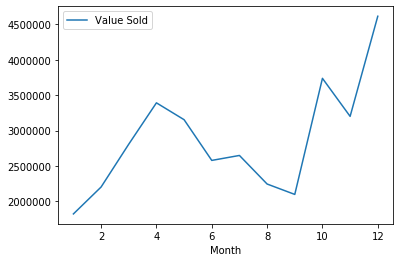

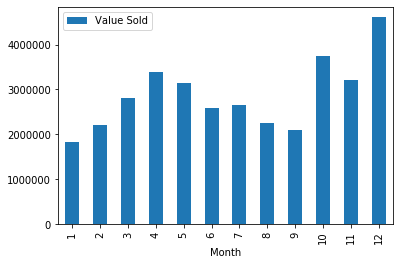

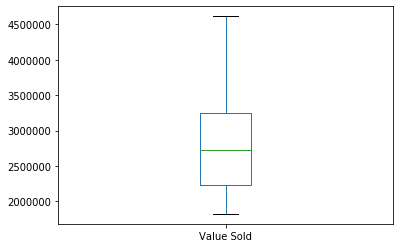

In [92]:
sales_per_month.plot()
sales_per_month.plot.bar()
sales_per_month.plot.box()
plt.show()

### City with hight number of sales

In [93]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Value Sold
123707,147247,Google Phone,1.0,600.00,2019-01-24 22:43:00,"862 Spruce St, Austin, TX 73301",1,600.00
123685,147226,Apple Airpods Headphones,1.0,150.00,2019-01-05 09:50:00,"855 6th St, Seattle, WA 98101",1,150.00
123696,147237,AA Batteries (4-pack),2.0,3.84,2019-01-30 01:06:00,"986 Willow St, San Francisco, CA 94016",1,7.68
123695,147236,AAA Batteries (4-pack),4.0,2.99,2019-01-29 20:28:00,"773 Ridge St, San Francisco, CA 94016",1,11.96
123694,147235,AAA Batteries (4-pack),1.0,2.99,2019-01-31 08:40:00,"474 Main St, Los Angeles, CA 90001",1,2.99


In [103]:
all_sales.iloc[0:100, 5]

123707            862 Spruce St, Austin, TX 73301
123685              855 6th St, Seattle, WA 98101
123696     986 Willow St, San Francisco, CA 94016
123695      773 Ridge St, San Francisco, CA 94016
123694         474 Main St, Los Angeles, CA 90001
                           ...                   
123399      570 Maple St, San Francisco, CA 94016
123605    420 Lincoln St, San Francisco, CA 94016
123604                42 5th St, Austin, TX 73301
123603      337 Cedar St, New York City, NY 10001
123602           564 Church St, Seattle, WA 98101
Name: Purchase Address, Length: 100, dtype: object

In [183]:
all_sales["City"] = all_sales["Purchase Address"].apply(lambda x: f'{str(x).split(",")[1]} ({str(x).split(",")[2].split(" ")[1]})')
all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Value Sold,City
123707,147247,Google Phone,1.0,600.00,2019-01-24 22:43:00,"862 Spruce St, Austin, TX 73301",1,600.00,Austin (TX)
123685,147226,Apple Airpods Headphones,1.0,150.00,2019-01-05 09:50:00,"855 6th St, Seattle, WA 98101",1,150.00,Seattle (WA)
123696,147237,AA Batteries (4-pack),2.0,3.84,2019-01-30 01:06:00,"986 Willow St, San Francisco, CA 94016",1,7.68,San Francisco (CA)
123695,147236,AAA Batteries (4-pack),4.0,2.99,2019-01-29 20:28:00,"773 Ridge St, San Francisco, CA 94016",1,11.96,San Francisco (CA)
123694,147235,AAA Batteries (4-pack),1.0,2.99,2019-01-31 08:40:00,"474 Main St, Los Angeles, CA 90001",1,2.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
45490,319665,iPhone,1.0,700.00,2019-12-15 11:13:00,"377 1st St, Atlanta, GA 30301",12,700.00,Atlanta (GA)
45491,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
45492,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
45446,319622,Macbook Pro Laptop,1.0,1700.00,2019-12-15 07:11:00,"180 Ridge St, Boston, MA 02215",12,1700.00,Boston (MA)


In [184]:
all_sales.City.value_counts()

 San Francisco (CA)    44732
 Los Angeles (CA)      29605
 New York City (NY)    24876
 Boston (MA)           19934
 Atlanta (GA)          14881
 Dallas (TX)           14820
 Seattle (WA)          14732
 Portland (OR)         10010
 Austin (TX)            9905
 Portland (ME)          2455
Name: City, dtype: int64

In [185]:
sales_nbr_per_city = all_sales.pivot_table(index="City", values="Value Sold", aggfunc="count").sort_values("Value Sold", ascending=False)
sales_nbr_per_city

,Value Sold
City,
San Francisco (CA),44732
Los Angeles (CA),29605
New York City (NY),24876
Boston (MA),19934
Atlanta (GA),14881
Dallas (TX),14820
Seattle (WA),14732
Portland (OR),10010
Austin (TX),9905


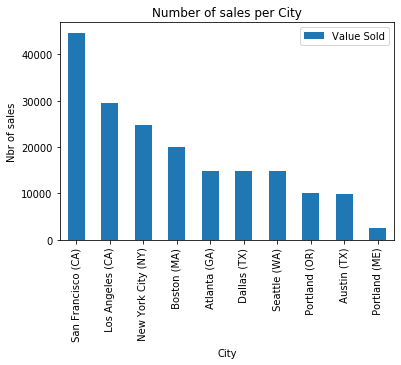

In [186]:
ax = sales_nbr_per_city.plot.bar()
ax.set_ylabel("Nbr of sales")
ax.set_title("Number of sales per City")
plt.show()

In [187]:
sales_per_city = all_sales.groupby("City").sum().sort_values("Value Sold", ascending=False)
sales_per_city

,Quantity Ordered,Price Each,Month,Value Sold
City,,,,
San Francisco (CA),50239.0,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289.0,5.421435e+06,208325,5.452571e+06
New York City (NY),27932.0,4.635371e+06,175741,4.664317e+06
Boston (MA),22528.0,3.637410e+06,141112,3.661642e+06
Atlanta (GA),16602.0,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730.0,2.752628e+06,104620,2.767975e+06
Seattle (WA),16553.0,2.733296e+06,104941,2.747755e+06
Portland (OR),11303.0,1.860558e+06,70621,1.870732e+06
Austin (TX),11153.0,1.809874e+06,69829,1.819582e+06


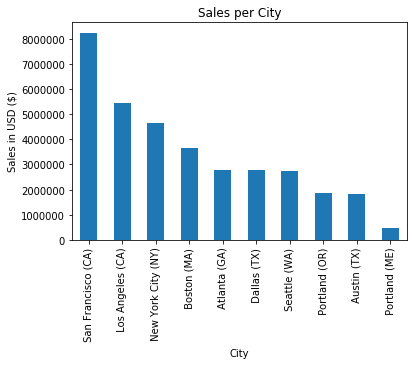

In [188]:
ax = sales_per_city["Value Sold"].plot.bar()
ax.set_ylabel("Sales in USD ($)")
ax.set_title("Sales per City")
plt.show()